In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

%matplotlib inline
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

: 

In [ ]:
# Load the data sample
df = pd.read_csv('../datastore/data.csv')

: 

In [3]:
# number of rows and columns
df.shape

(4078318, 61)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4078318 entries, 0 to 4078317
Data columns (total 61 columns):
 #   Column                                   Dtype  
---  ------                                   -----  
 0   FlightDate                               object 
 1   Airline                                  object 
 2   Origin                                   object 
 3   Dest                                     object 
 4   Cancelled                                bool   
 5   Diverted                                 bool   
 6   CRSDepTime                               int64  
 7   DepTime                                  float64
 8   DepDelayMinutes                          float64
 9   DepDelay                                 float64
 10  ArrTime                                  float64
 11  ArrDelayMinutes                          float64
 12  AirTime                                  float64
 13  CRSElapsedTime                           float64
 14  ActualElapsedTime 

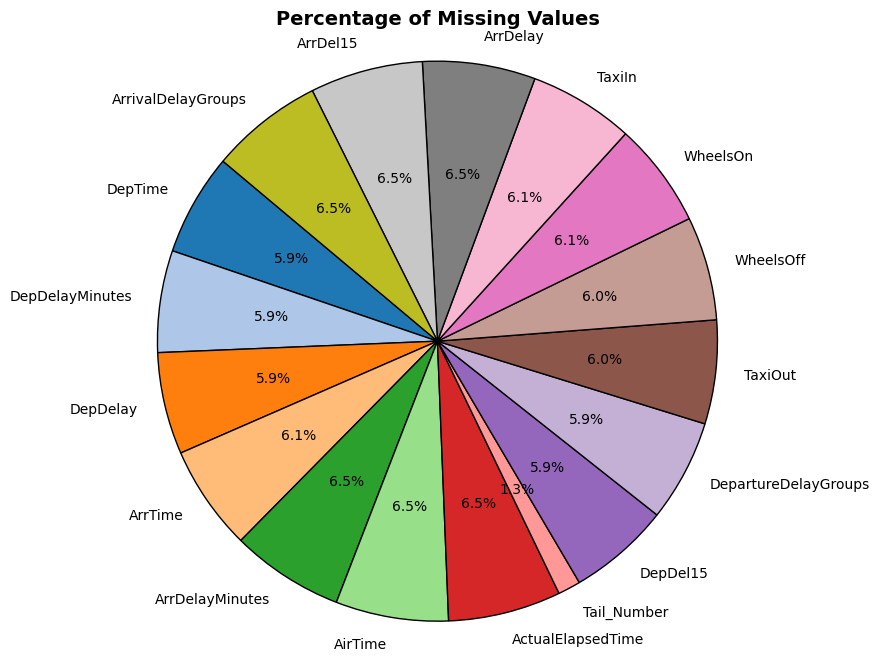

In [14]:
import matplotlib.pyplot as plt

# Step 1: Calculate the percentage of missing values for each column
missing_percent = df.isnull().mean() * 100

# Step 2: Filter out columns with no missing values
missing_percent = missing_percent[missing_percent > 0]

# Step 3: Plot the pie chart with minimalistic style and custom colors
plt.figure(figsize=(10, 8))

# Define custom colors
colors = plt.get_cmap('tab20').colors

plt.pie(
    missing_percent, 
    labels=missing_percent.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=colors,
    wedgeprops={'edgecolor': 'black'}
)

plt.title('Percentage of Missing Values', fontsize=14, fontweight='bold')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

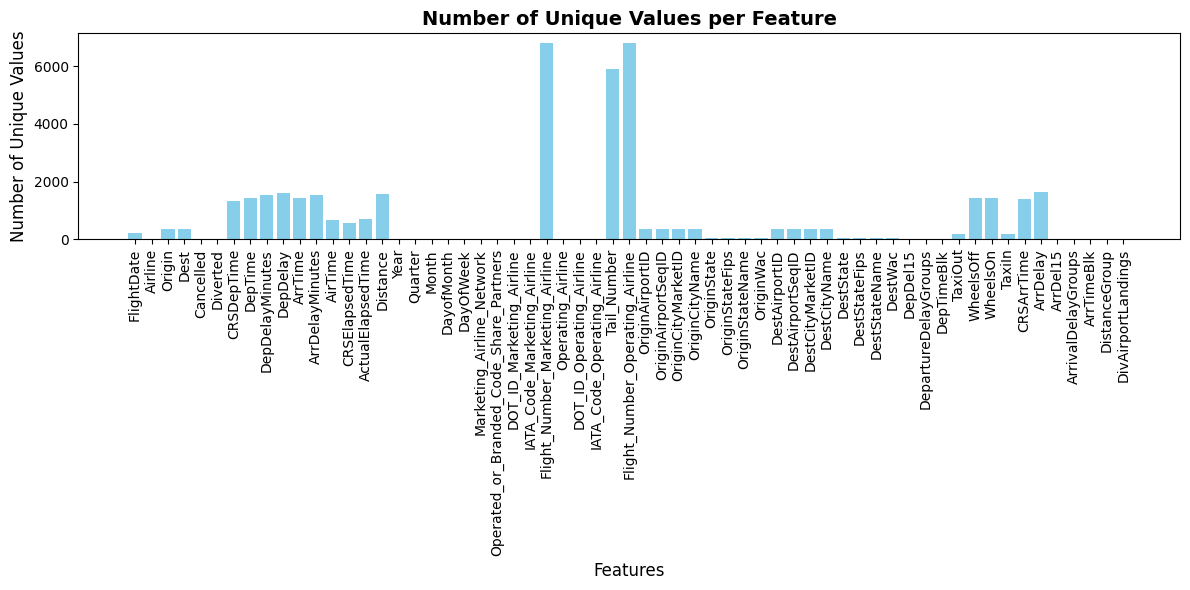

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Calculate the number of unique values for each feature
unique_values = df.nunique()

# Step 2: Plot the histogram
plt.figure(figsize=(12, 6))
plt.bar(unique_values.index, unique_values.values, color='skyblue')
plt.xlabel('Features', fontsize=12)
plt.ylabel('Number of Unique Values', fontsize=12)
plt.title('Number of Unique Values per Feature', fontsize=14, fontweight='bold')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [24]:
df_small = df.sample(frac=0.2)

In [25]:
df_small.shape 

(815664, 61)

In [37]:
from src.data import preprocess_data

In [38]:
from omegaconf import OmegaConf


cfg = OmegaConf.load('../configs/data_transformations.yaml')
X,y = preprocess_data(df=df_small,cfg=cfg)

In [40]:
X

,FlightDate,Airline,Origin,Dest,Diverted,CRSDepTime,CRSElapsedTime,Distance,Year,Quarter,Month,DayofMonth,DayOfWeek,Marketing_Airline_Network,Operated_or_Branded_Code_Share_Partners,DOT_ID_Marketing_Airline,IATA_Code_Marketing_Airline,Flight_Number_Marketing_Airline,Operating_Airline,DOT_ID_Operating_Airline,IATA_Code_Operating_Airline,Flight_Number_Operating_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,DestCityName,DestState,DestStateFips,DestStateName,DestWac,DepTimeBlk,CRSArrTime,ArrTimeBlk,DistanceGroup,DivAirportLandings,Quarter_sin,Quarter_cos,Month_sin,Month_cos,DayofMonth_sin,DayofMonth_cos,DayOfWeek_sin,DayOfWeek_cos,CRSArrTime_HH,CRSArrTime_MM,CRSArrTime_HH_sin,CRSArrTime_HH_cos,CRSArrTime_MM_sin,CRSArrTime_MM_cos,CRSDepTime_HH,CRSDepTime_MM,CRSDepTime_HH_sin,CRSDepTime_HH_cos,CRSDepTime_MM_sin,CRSDepTime_MM_cos,CRSElapsedTime_HH,CRSElapsedTime_MM,CRSElapsedTime_HH_sin,CRSElapsedTime_HH_cos,CRSElapsedTime_MM_sin,CRSElapsedTime_MM_cos
3389511,757,474,919,277,False,1325,95.0,391.0,2022,1,1,8,6,841,405,19977,841,4706,118,20304,118,4706,11097,1109702,31097,247,155,56,236,88,11292,1129202,30325,77,472,8,675,82,794,1500,189,2,0,1.000000e+00,1.000000e+00,5.000000e-01,5.000000e-01,9.987165e-01,9.987165e-01,-7.818315e-01,-7.818315e-01,15,0,-0.707107,-0.707107,0.000000e+00,0.000000e+00,13,25,-2.588190e-01,-2.588190e-01,5.000000e-01,5.000000e-01,0.0,95.0,0.000000,0.000000,-0.500000,-0.500000
1445408,103,997,450,795,False,1550,214.0,1303.0,2022,3,7,17,7,854,854,19805,854,1752,854,19805,854,1752,14100,1410005,34100,28,292,42,497,23,11298,1129806,30194,71,673,48,314,74,189,1824,864,6,0,-1.000000e+00,-1.000000e+00,-5.000000e-01,-5.000000e-01,-2.993631e-01,-2.993631e-01,-2.449294e-16,-2.449294e-16,18,24,-1.000000,-1.000000,5.877853e-01,5.877853e-01,15,50,-7.071068e-01,-7.071068e-01,-8.660254e-01,-8.660254e-01,2.0,14.0,0.500000,0.500000,0.994522,0.994522
819142,431,928,457,547,False,1805,181.0,1089.0,2022,1,2,2,3,29,29,20409,29,2692,29,20409,29,2692,13303,1330303,32467,122,275,12,224,33,12478,1247805,31703,990,248,36,883,22,864,2106,496,5,0,1.000000e+00,1.000000e+00,8.660254e-01,8.660254e-01,3.943559e-01,3.943559e-01,4.338837e-01,4.338837e-01,21,6,-0.707107,-0.707107,5.877853e-01,5.877853e-01,18,5,-1.000000e+00,-1.000000e+00,5.000000e-01,5.000000e-01,1.0,81.0,0.258819,0.258819,0.809017,0.809017
2053845,521,723,420,738,False,1706,118.0,591.0,2022,2,5,8,7,355,355,19790,355,2920,355,19790,355,2920,13232,1323202,30977,361,783,17,551,41,10397,1039707,30397,253,969,13,731,34,608,2004,802,3,0,1.224647e-16,1.224647e-16,5.000000e-01,5.000000e-01,9.987165e-01,9.987165e-01,-2.449294e-16,-2.449294e-16,20,4,-0.866025,-0.866025,4.067366e-01,4.067366e-01,17,6,-9.659258e-01,-9.659258e-01,5.877853e-01,5.877853e-01,1.0,18.0,0.258819,0.258819,0.951057,0.951057
3808557,225,474,759,43,False,1340,134.0,840.0,2022,1,3,25,5,355,89,19790,355,3525,118,20304,118,3525,14869,1486903,34614,394,334,49,22,87,13871,1387102,33316,773,280,31,435,65,794,1654,640,4,0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-9.377521e-01,-9.377521e-01,-9.749279e-01,-9.749279e-01,16,54,-0.866025,-0.866025,-5.877853e-01,-5.877853e-01,13,40,-2.588190e-01,-2.588190e-01,-8.660254e-01,-8.660254e-01,1.0,34.0,0.258819,0.258819,-0.406737,-0.406737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1732844,96,474,687,728,False,1100,74.0,296.0,2022,2,5,31,2,355,89,19790,355,3661,118,20304,118,3661,10408,1040805,30408,922,335,55,239,45,11433,1143302,31295,651,855,26,968,43,946,1314,794,2,0,1.224647e-16,1.224647e-16,5.000000e-01,5.000000e-01,-2.449294e-16,-2.449294e-16,9.749279e-01,9.749279e-01,13,14,-0.258819,-0.258819,9.945219e-01

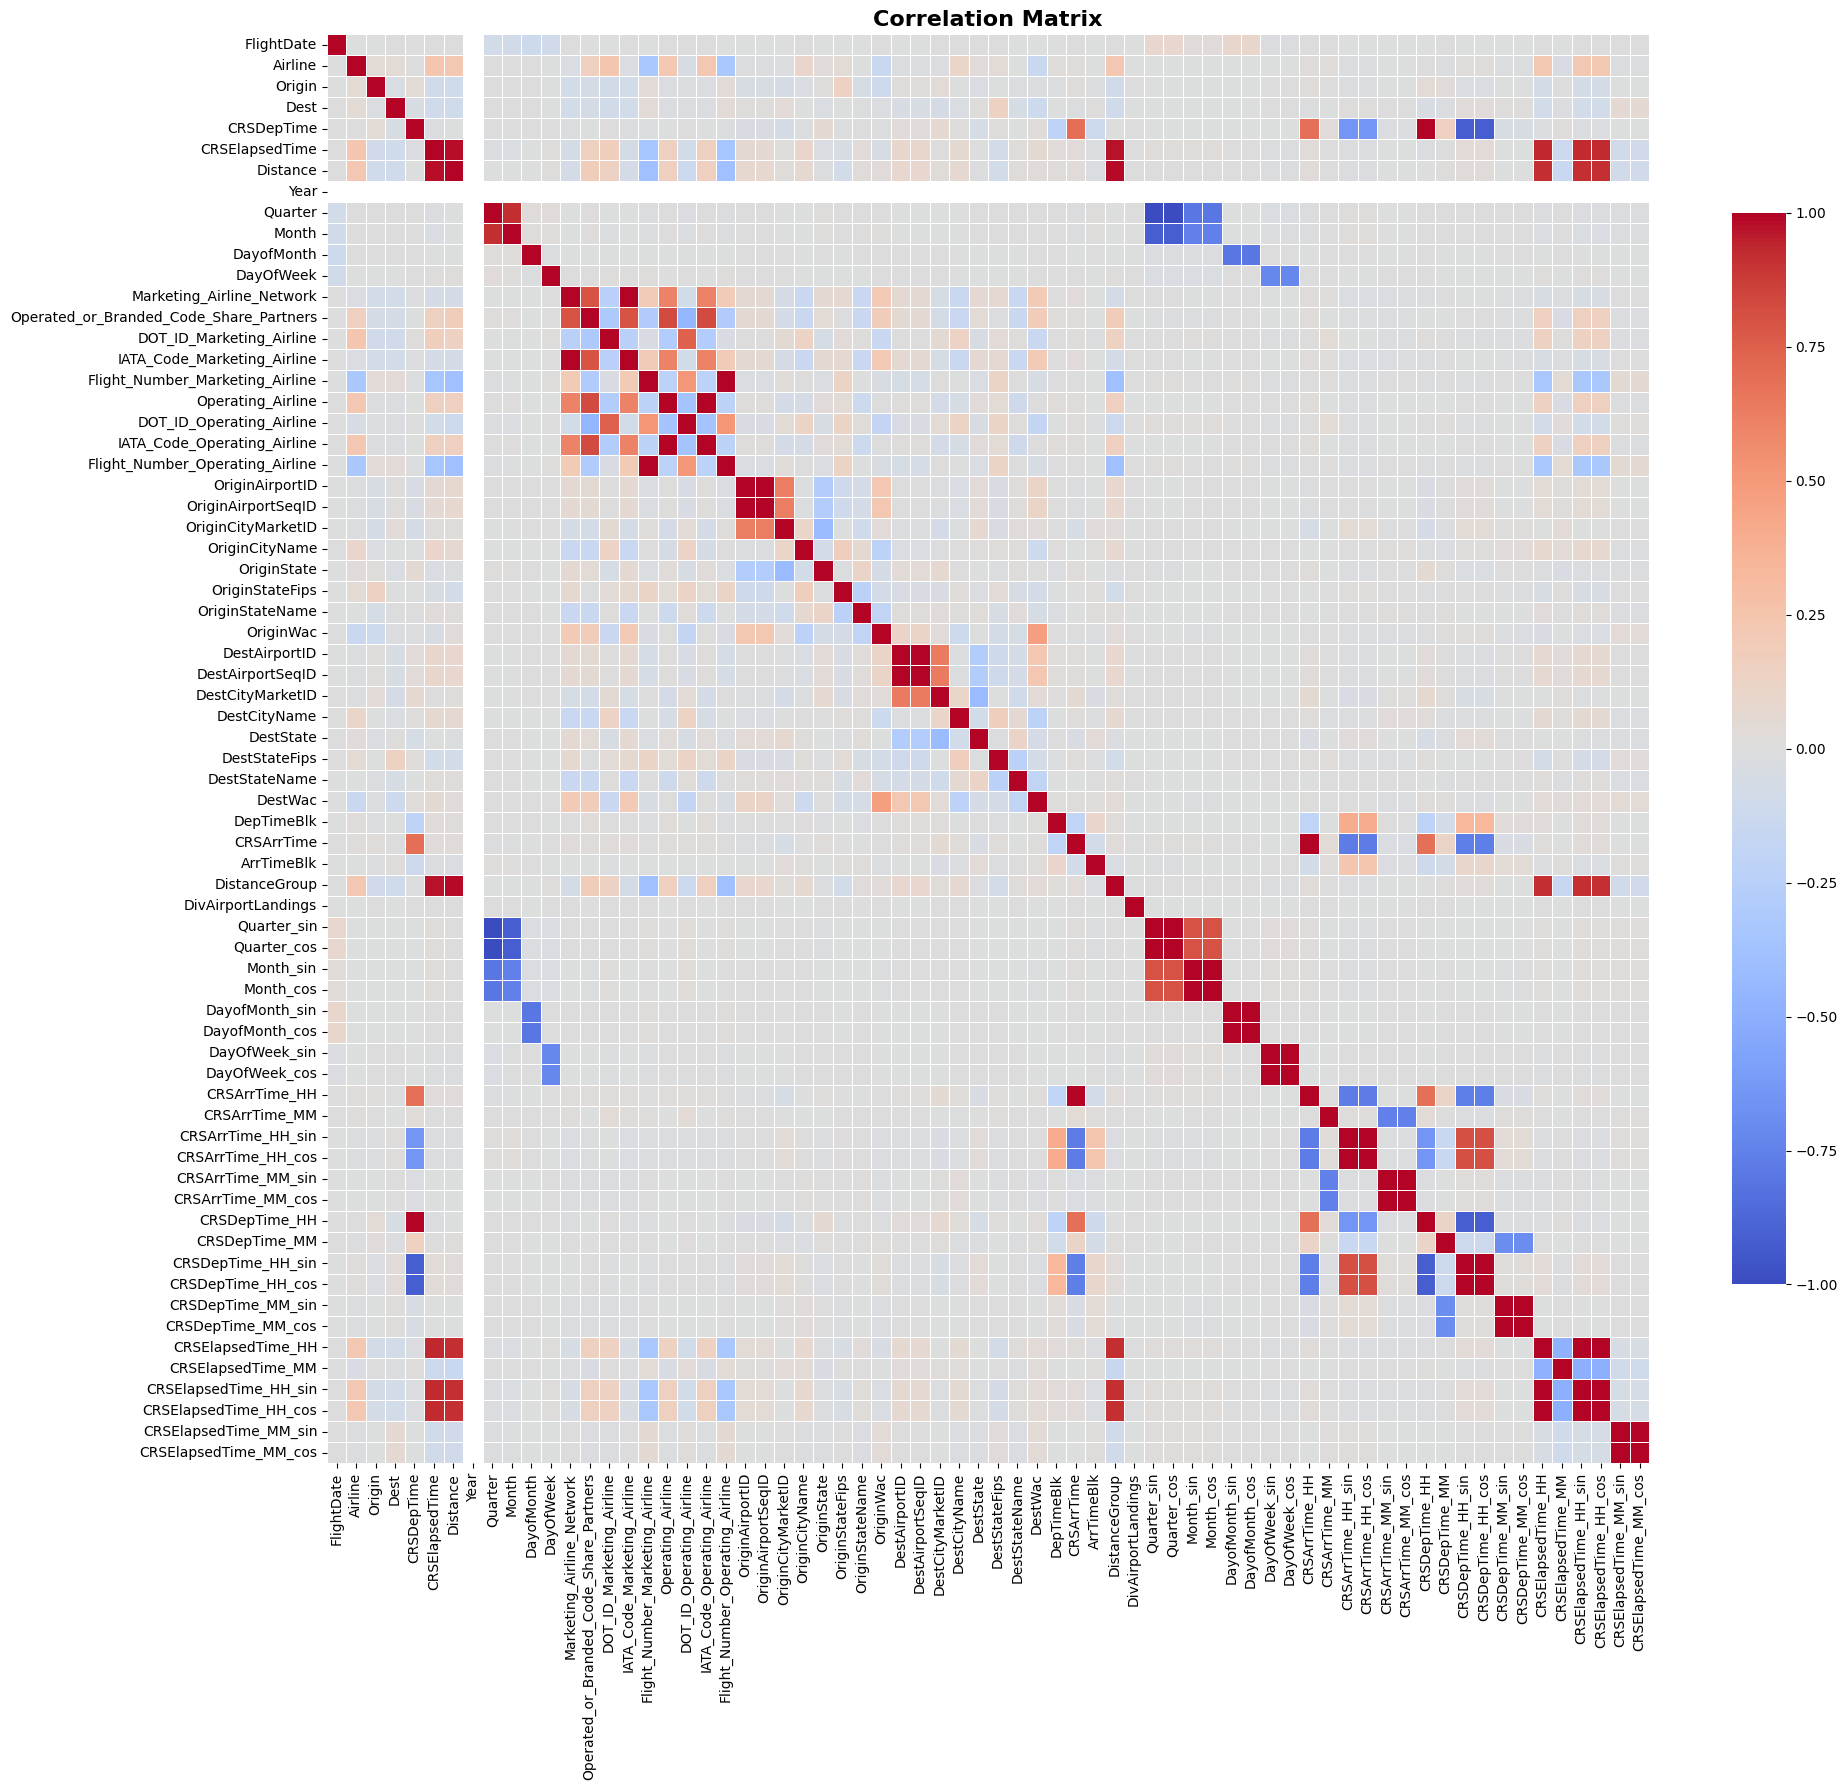

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Select only numeric columns
numeric_df = X.select_dtypes(include=[float, int])

# Step 2: Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Step 3: Plot the correlation matrix using a heatmap
plt.figure(figsize=(20, 18))
sns.heatmap(
    corr_matrix, 
    annot=False, 
    cmap='coolwarm', 
    linewidths=0.5, 
    cbar_kws={"shrink": 0.75}
)
plt.title('Correlation Matrix', fontsize=16, fontweight='bold')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()